# Occurrence frequencies of IVT object for ERA5 over regional ICON domain (1998-2022)


In [1]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import datetime
import cartopy
from metpy.units import units
import cartopy.crs as ccrs
import pickle
import os

from src.utils import * 
from src.Corrections import * 
from src.Enumerations import Month, Season, Experiments
from src.xarray_util import create_obj_from_dict,  ObjectContainer,  load_tracking_objects
from src.plot_funcs import *


/work/aa0238/a271093/Conda/MOAAP_env/lib/python3.12/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()
/work/aa0238/a271093/Scripts/MOAAP/src/xarray_util.py:27: AccessorRegistrationWarning: registration of accessor <class 'src.xarray_util.Accessor'> under name 'get' for type <class 'xarray.core.dataset.Dataset'> is overriding a preexisting attribute with the same name.
  @xr.register_dataset_accessor("get")


## Settings

In [2]:
exp_ICON_NWP=Experiments.ICON_NWP_REFINED.value
exp_ERA5=Experiments.ERA5.value
exp_ICON_ERA5=Experiments.ICON_ERA5.value


input_path_ICON_ERA5= exp_ICON_ERA5.IVTobj_out_path
input_path_ERA5= exp_ERA5.IVTobj_out_path
input_path_ICON_NWP= exp_ICON_NWP.IVTobj_out_path


type_='IVT'
input_file_name_temp_ERA5 = 'MOAPP_ERA5_100and85controlperc_remapped_3x'
input_file_name_temp_ICON_NWP = 'MOAPP_ICON_100and85ERA5perc_remapped_3x'
input_file_name_temp_ICON_ERA5 = 'MOAPP_ICON_ERA5_100and85ERA5perc_remapped_3x'


first_year = 1998
last_year = 2014

num_years = last_year-first_year

## Load pickle dictionaries into in-memory Datasets

In [3]:
IVT_objs_ICON_NWP = load_tracking_objects(input_path_ICON_NWP,
                                      input_file_name_temp_ICON_NWP,
                                      type_, exp_ICON_NWP.year_start,
                                      exp_ICON_NWP.year_end,
                                      load_coordinates=True,
                                      compute_hist = False,
                                      load_clusters=True,
                                      exp=exp_ICON_NWP,
                                      
                                     
                                      )
    
    

/work/aa0238/a271093/results/MOAAP/IVT_Tracking/ICON_NWP_refined_remapped_3x/Object_container_1985-2014_withClusters exists. Loading...


In [4]:
IVT_objs_ICON_ERA5 = load_tracking_objects(input_path_ICON_ERA5,
                                      input_file_name_temp_ICON_ERA5,
                                      type_, 1998,
                                      2022,
                                      load_coordinates=True,
                                      exp=exp_ICON_ERA5,
                                      
                                     
                                      )

/work/aa0238/a271093/results/MOAAP/IVT_Tracking/ICON_DRIVENBY_ERA5_remapped_3x/Object_container_1998-2022 exists. Loading...


In [5]:
IVT_objs_ERA5 = load_tracking_objects(input_path_ERA5,
                                      input_file_name_temp_ERA5,
                                      type_,
                                      1979,
                                      2022,
                                      load_coordinates=True,
                                      load_clusters=True,
                                      exp=exp_ERA5,
                                      
                                      )

/work/aa0238/a271093/results/MOAAP/IVT_Tracking/ERA5_ICON_remapped_3x/Object_container_1979-2022_withClusters exists. Loading...


In [6]:
IVT_objs_ERA5 = IVT_objs_ERA5.sel_years(year_start = first_year, year_end = last_year)
IVT_objs_ICON_ERA5 = IVT_objs_ICON_ERA5.sel_years(year_start = first_year, year_end = last_year)
IVT_objs_ICON_NWP = IVT_objs_ICON_NWP.sel_years(year_start = first_year, year_end = last_year)

# Plot number of days per season where a grid cell is part of an IVT object

Season.DJF
Season.MAM
Season.JJA
Season.SON


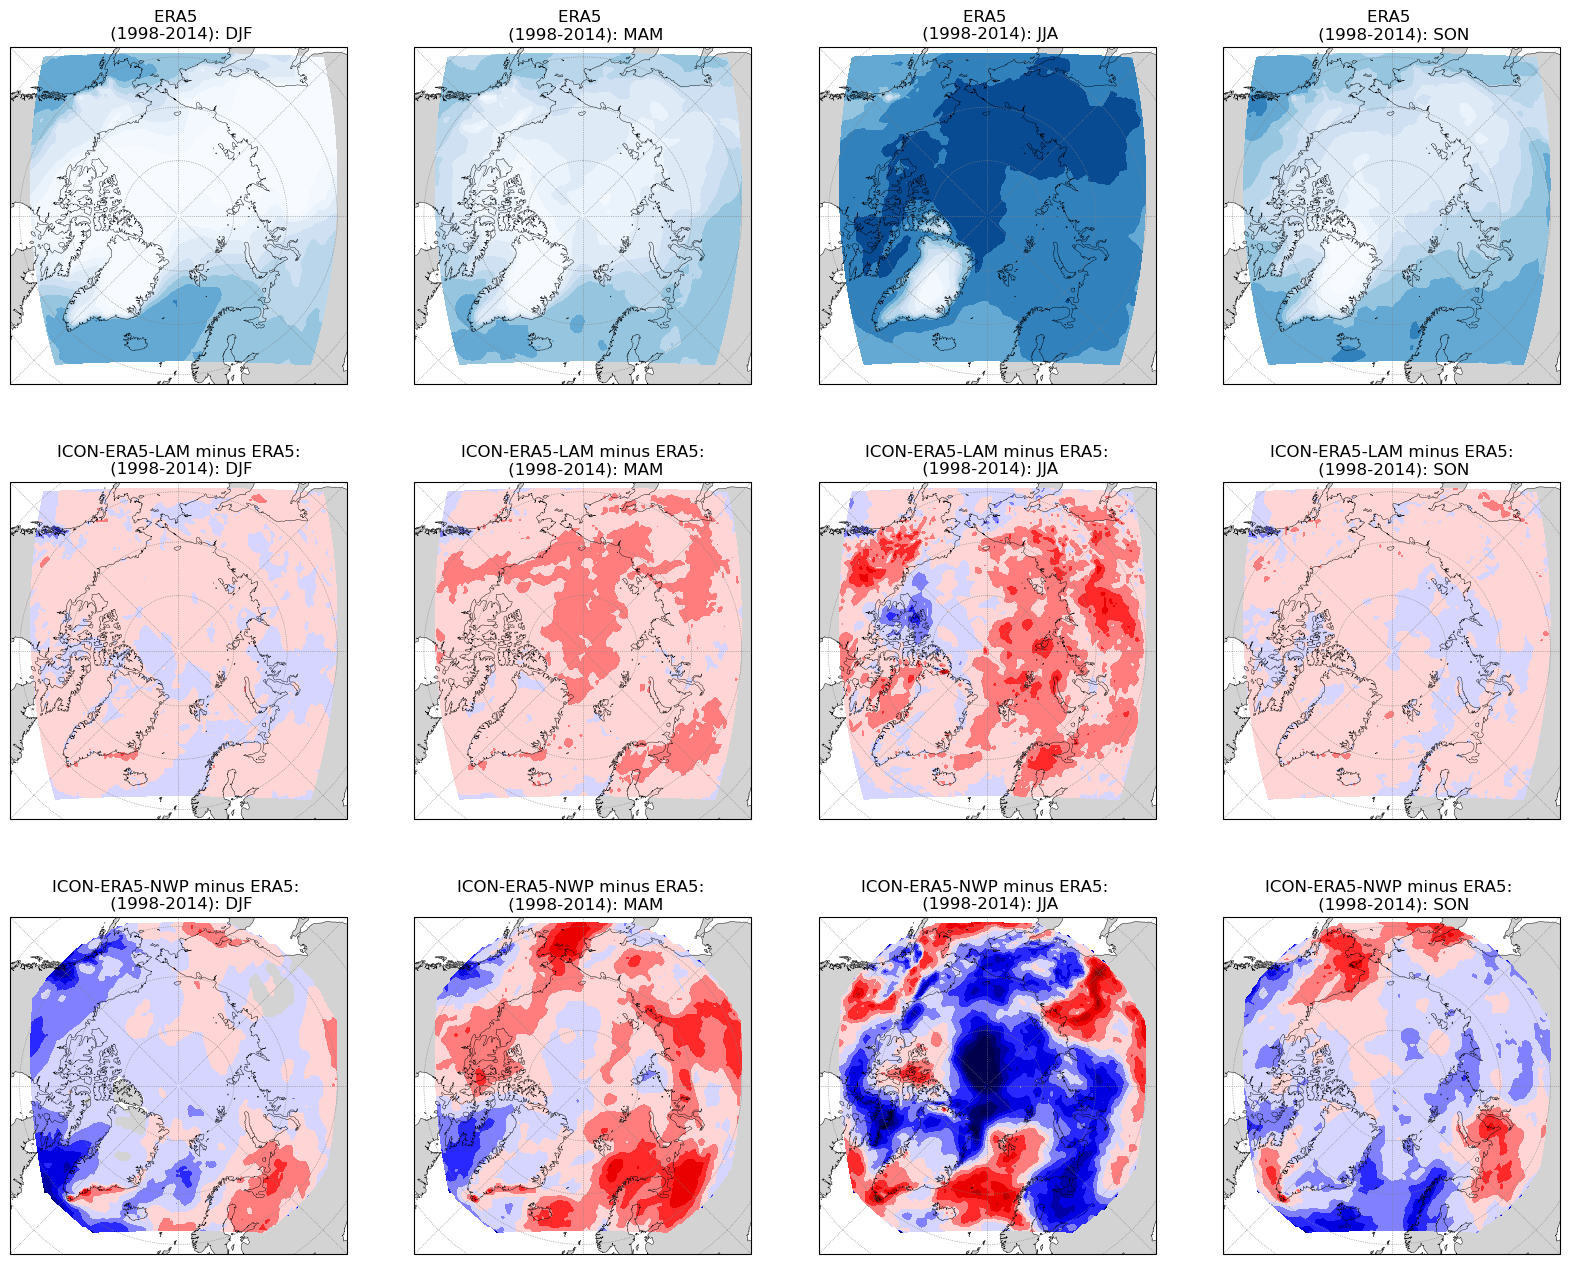

In [8]:

fig = plt.figure(figsize=(20,16))
subplts = (3,4)
levels=np.arange(1,30,1)
levels=[1,2,3,5,7,9,12,15,20,25]
for i, season_ in enumerate(Season):
    print (season_)
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_)

    lon,lat,z_ERA5 = count_objs_grid_points(IVTobjs_sel_ERA5, normalization_factor=24.)
    
    # normalize grid point counts to counts per season
    z_ERA5= (z_ERA5/num_years)
    
    plot_on_rotated_grid(lon,
                                  lat, 
                                  z_ERA5, 
                                  fig=fig,
                                  index = i,
                                  subplts=subplts,
 
                                  levels = levels,
                                  title=f"ERA5 \n ({first_year}-{last_year}): {season_.name}",
                                  cbar_label = "IVT object days \n per season",
                                   cbar=False,
                                    extend="both"

                                  )
    

    IVTobjs_sel_ICON_ERA5 = IVT_objs_ICON_ERA5.sel_season(season_)

    lon,lat,z_ICON_ERA5 = count_objs_grid_points(IVTobjs_sel_ICON_ERA5, normalization_factor=24.)
    
    # normalize grid point counts to counts per season
    z_ICON_ERA5= (z_ICON_ERA5/num_years)


    
    
    plot_on_rotated_grid(lon,
                                  lat, 
                                  z_ICON_ERA5-z_ERA5, 
                                  fig=fig,
                                  index = i+4,
                                  subplts=subplts,
                                   cmap="seismic",
 
                                  levels = np.arange(-6,6.5,1),
                                  title=f"ICON-ERA5-LAM minus ERA5:\n ({first_year}-{last_year}): {season_.name}",
                                  cbar_label = "IVT object days difference \n per season",
                                   cbar=False,
                                 extend="both"
                                  )

    IVTobjs_sel_ICON_NWP = IVT_objs_ICON_NWP.sel_season(season_)

    lon,lat,z_ICON_NWP = count_objs_grid_points(IVTobjs_sel_ICON_NWP, normalization_factor=24.)
    
    # normalize grid point counts to counts per season
    z_ICON_NWP= (z_ICON_NWP/num_years)

    z_ICON_NWP[z_ICON_NWP <0.0001] =np.nan


    
    
    plot_on_rotated_grid(lon,
                                  lat, 
                                  z_ICON_NWP-z_ERA5, 
                                  fig=fig,
                                  index = i+8,
                                  subplts=subplts,
                                   cmap="seismic",
 
                                  levels = np.arange(-6,6.5,1),
                                  title=f"ICON-ERA5-NWP minus ERA5: \n ({first_year}-{last_year}): {season_.name}",
                                  cbar_label = "IVT object day difference \n per season",
                                   cbar=False,
                                    extend="both"

                                  )




Season.DJF


/tmp/ipykernel_2293625/3777243728.py:38: RuntimeWarning: divide by zero encountered in divide
  rel_diff_LAM = (z_ICON_ERA5-z_ERA5)/z_ERA5 *100
/tmp/ipykernel_2293625/3777243728.py:38: RuntimeWarning: invalid value encountered in divide
  rel_diff_LAM = (z_ICON_ERA5-z_ERA5)/z_ERA5 *100
/tmp/ipykernel_2293625/3777243728.py:68: RuntimeWarning: divide by zero encountered in divide
  rel_diff_NWP = (z_ICON_NWP-z_ERA5)/z_ERA5 *100


Season.MAM
Season.JJA
Season.SON


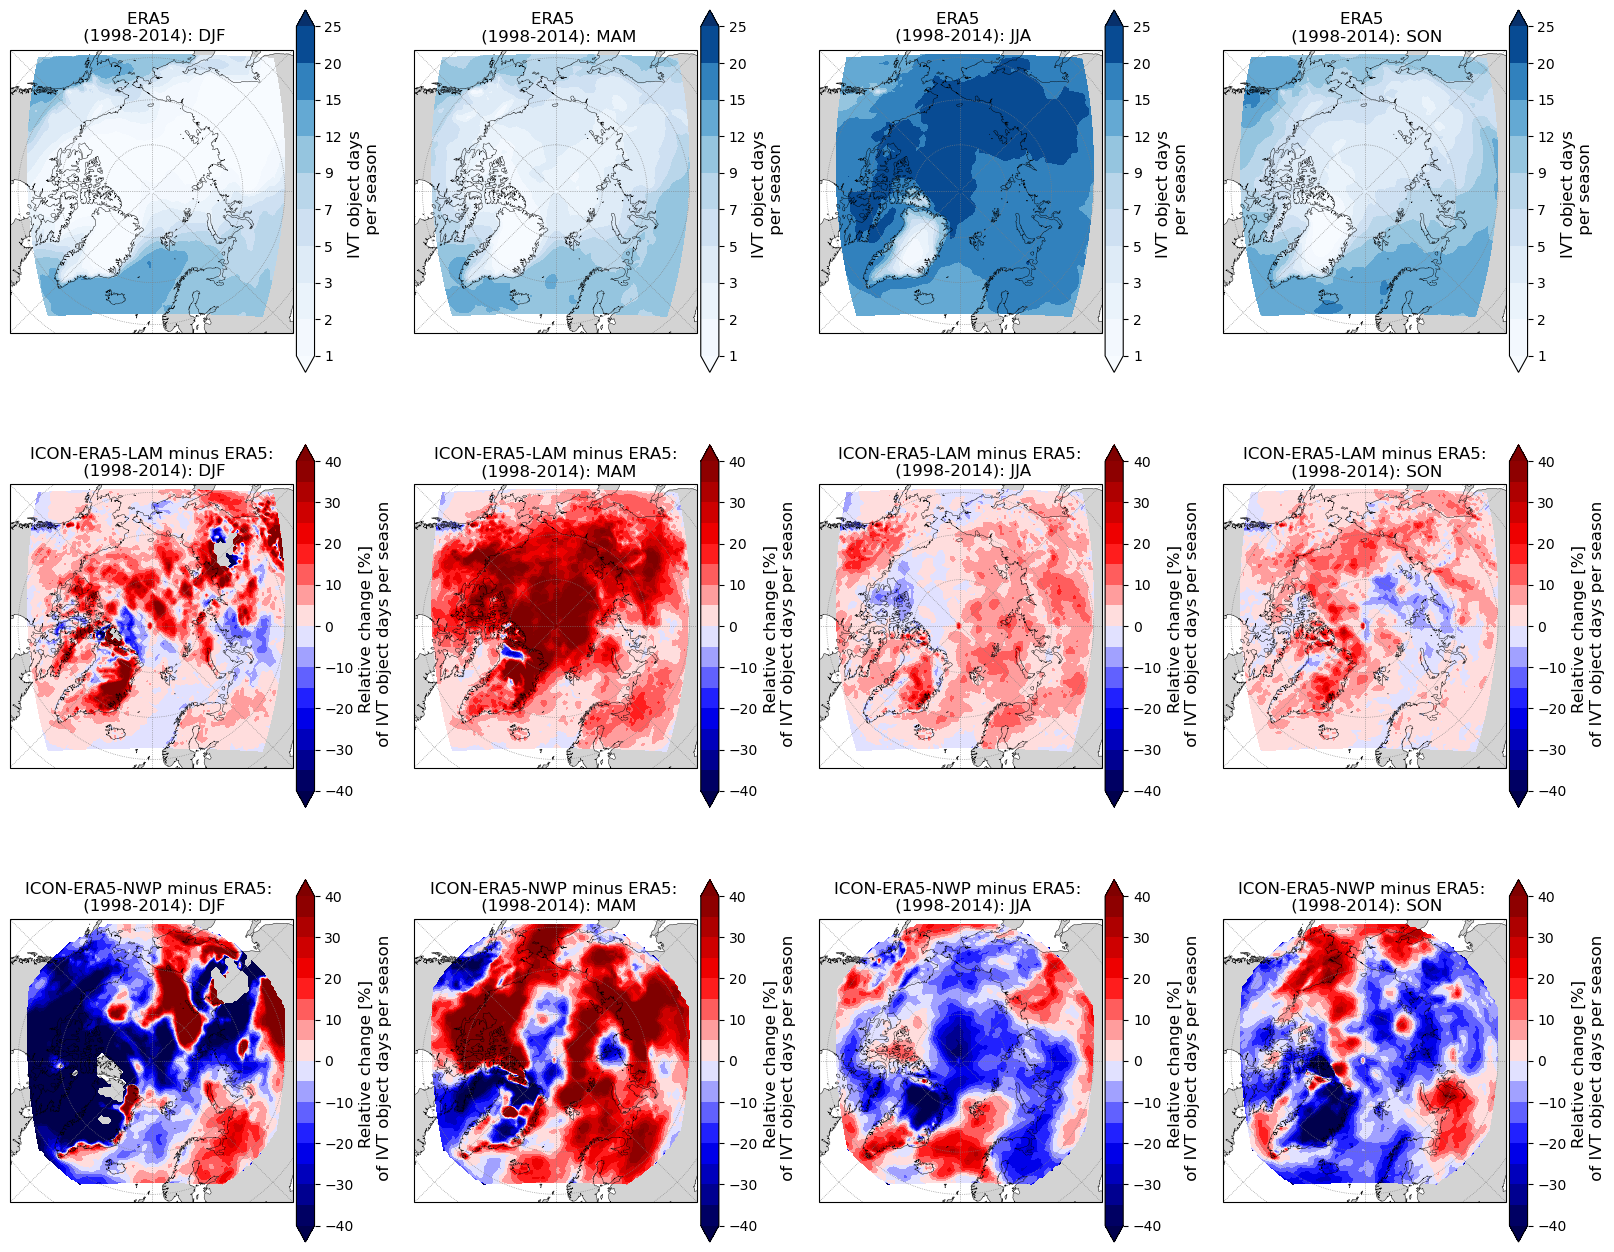

In [10]:
fig = plt.figure(figsize=(20,16))
subplts = (3,4)
levels=np.arange(1,30,1)
levels=[1,2,3,5,7,9,12,15,20,25]
for i, season_ in enumerate(Season):
    print (season_)
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_)

    lon,lat,z_ERA5 = count_objs_grid_points(IVTobjs_sel_ERA5, normalization_factor=24.)
    
    # normalize grid point counts to counts per season
    z_ERA5= (z_ERA5/num_years)
    
    plot_on_rotated_grid(lon,
                                  lat, 
                                  z_ERA5, 
                                  fig=fig,
                                  index = i,
                                  subplts=subplts,
 
                                  levels = levels,
                                  title=f"ERA5 \n ({first_year}-{last_year}): {season_.name}",
                                  cbar_label = "IVT object days \n per season",
                                   cbar=True,
                                    extend="both"

                                  )
    

    IVTobjs_sel_ICON_ERA5 = IVT_objs_ICON_ERA5.sel_season(season_)

    lon,lat,z_ICON_ERA5 = count_objs_grid_points(IVTobjs_sel_ICON_ERA5, normalization_factor=24.)
    
    # normalize grid point counts to counts per season
    z_ICON_ERA5= (z_ICON_ERA5/num_years)

    rel_diff_LAM = (z_ICON_ERA5-z_ERA5)/z_ERA5 *100



    
    
    plot_on_rotated_grid(lon,
                                  lat, 
                                  rel_diff_LAM, 
                                  fig=fig,
                                  index = i+4,
                                  subplts=subplts,
                                   cmap="seismic",
 
                                  levels = np.arange(-40,45,5),
                                  title=f"ICON-ERA5-LAM minus ERA5:\n ({first_year}-{last_year}): {season_.name}",
                                  cbar_label = "Relative change [%] \n of IVT object days per season",
                                   cbar=True,
                                 extend="both"
                                  )

    IVTobjs_sel_ICON_NWP = IVT_objs_ICON_NWP.sel_season(season_)

    lon,lat,z_ICON_NWP = count_objs_grid_points(IVTobjs_sel_ICON_NWP, normalization_factor=24.)
    
    # normalize grid point counts to counts per season
    z_ICON_NWP= (z_ICON_NWP/num_years)

    z_ICON_NWP[z_ICON_NWP <0.0001] =np.nan
    
    rel_diff_NWP = (z_ICON_NWP-z_ERA5)/z_ERA5 *100


    
    
    plot_on_rotated_grid(lon,
                                  lat, 
                                  rel_diff_NWP, 
                                  fig=fig,
                                  index = i+8,
                                  subplts=subplts,
                                   cmap="seismic",
 
                                  levels = np.arange(-40,45,5),
                                  title=f"ICON-ERA5-NWP minus ERA5: \n ({first_year}-{last_year}): {season_.name}",
                                  cbar_label = "Relative change [%] \n of IVT object days per season",
                                   cbar=True,
                                    extend="both"

                                  )
